In [9]:
%load_ext autoreload
%autoreload 2
import warnings
warnings.filterwarnings('ignore')

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


    Note: run in megabouts_dlc

In [10]:
import os
import json

# Data Wrangling
import h5py
import numpy as np
import pandas as pd
from pathlib import Path
import glob
import tables
import flammkuchen as fl

# Computation
from scipy.interpolate import interp1d

#custom functions
from datetime import datetime
import math
import seaborn as sns
import matplotlib.pyplot as plt
import itertools
from scipy.signal.signaltools import correlate

from tqdm import tqdm

In [11]:
from segmentation_helper import labels_cat, color
from segmentation_helper import reindex_clusters

In [12]:
from megabouts.utils import (
    bouts_category_name,
    bouts_category_name_short,
    bouts_category_color,
    cmp_bouts,
)


# Set up paths

In [13]:
master_path = Path(Path(r'\\portulab.synology.me\data\Kata\Figures_Paper\Koetter-et-al_data\Testdata') / 'Raw_Data')
out_path = Path(master_path/'Processed_Data')
fish_paths = list(master_path.glob('*f[0-9]*'))
fish_paths

[WindowsPath('//portulab.synology.me/data/Kata/Figures_Paper/Koetter-et-al_data/Testdata/Raw_Data/240423_f0')]

In [14]:
fish= 0
fish_path = fish_paths[fish]
fish_id =  fish_paths[fish].name
exp_name = 'testfish'
exp_name, fish_id

('testfish', '240423_f0')

In [15]:
print ("{} videos found".format(len(fish_paths)))

1 videos found


## Loop

In [16]:

for ind, fish_path in enumerate(tqdm(fish_paths)):
    fish_id =  fish_path.name
    print ('Working on fish {}'.format(fish_id))
    
    data = fl.load(Path(out_path/ '{}_bout_data.h5'.format(fish_id)))
    print('working with {} detected bouts'.format(len(data['cluster'])))
    
    clusters = data['cluster']
    reindexed = reindex_clusters(clusters)
    fl.save(out_path / '{}_reindex_clusters.h5'.format(fish_id), reindexed)



100%|████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00,  8.72it/s]

Working on fish 240423_f0
working with 506 detected bouts


### check extracted data

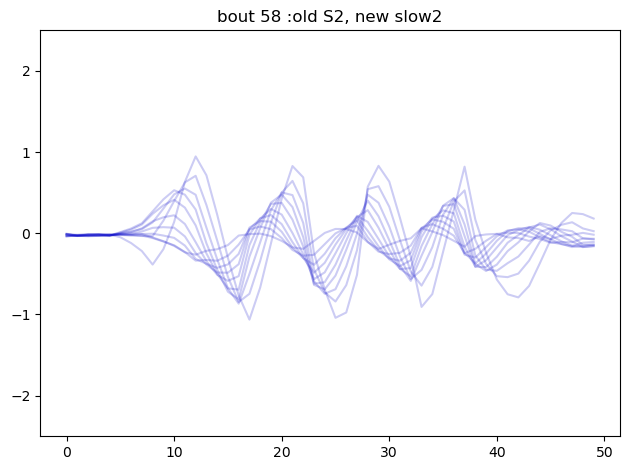

In [20]:
# Generate a random integer from 0 to num_elements - 1
bout = np.random.randint(0, data['tailsums'].shape[0])

plt.figure()
plt.title(f'bout {bout} :old {bouts_category_name_short[clusters[bout][0]]}, new {labels_cat[reindexed[bout][0]]}')
plt.plot(data['tail_vectors'][bout], c=color[reindexed[bout][0]], alpha=0.2)
plt.ylim(-2.5, 2.5)
plt.tight_layout()